Predicting if Bank telemarketing results in bank term deposit using a classification model.



By Anthony Chau

## Data attributes

This data is from a Portuguese banking institution that contains 21 attributes. 

## Attributes
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular','telephone') 
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric) 
- cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)
- y - has the client subscribed a term deposit? (binary: 'yes','no')



In [63]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [64]:
import warnings
warnings.filterwarnings("ignore")

In [65]:
df=pd.read_csv('bank-new.csv')

In [66]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [68]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [69]:
df.shape

(4521, 17)

In [70]:
#check for nan values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [71]:
# all the unique values of each attribute
for var in df:
    print(var,'\n',df[var].unique(),'\n')

age 
 [30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84] 

job 
 ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown'] 

marital 
 ['married' 'single' 'divorced'] 

education 
 ['primary' 'secondary' 'tertiary' 'unknown'] 

default 
 ['no' 'yes'] 

balance 
 [ 1787  4789  1350 ...  -333 -3313  1137] 

housing 
 ['no' 'yes'] 

loan 
 ['no' 'yes'] 

contact 
 ['cellular' 'unknown' 'telephone'] 

day 
 [19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 18 12 21 26 22  2  4 15  8
 28  9  1 10 31 25 24] 

month 
 ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec'] 

duration 
 [  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148   96  140  109  125  169  182  247  119
  149   74  

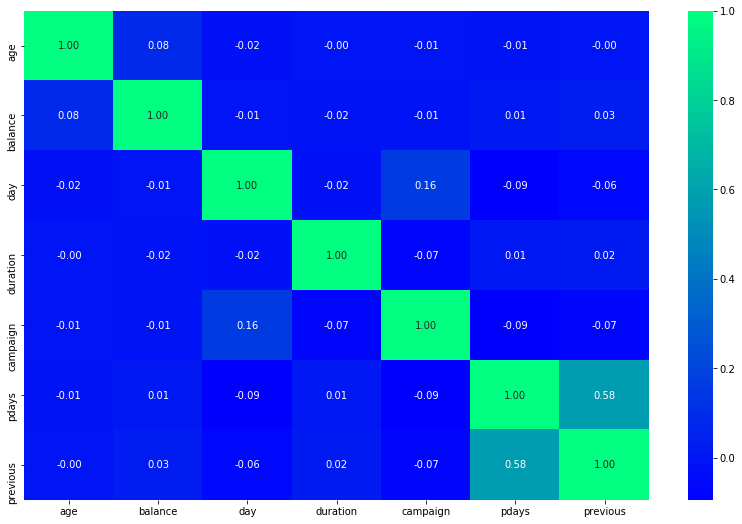

In [72]:
#Is there collinearity?
plt.figure(figsize=(14, 9))
sns.heatmap(data = df.corr(), cmap="winter", fmt=".2f", annot=True)

Not much collinearity shown here.

In [73]:

corrmat=df.corr()
corrmat

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


In [74]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [75]:
##Lets look at Variance Inflation Factor and check for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(df[['age','balance','day','duration','campaign','pdays','previous']])##choose columns from above, only numeric fields
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const       22.261639
age          1.007513
balance      1.008210
day          1.033819
duration     1.005384
campaign     1.037721
pdays        1.513716
previous     1.502266
dtype: float64

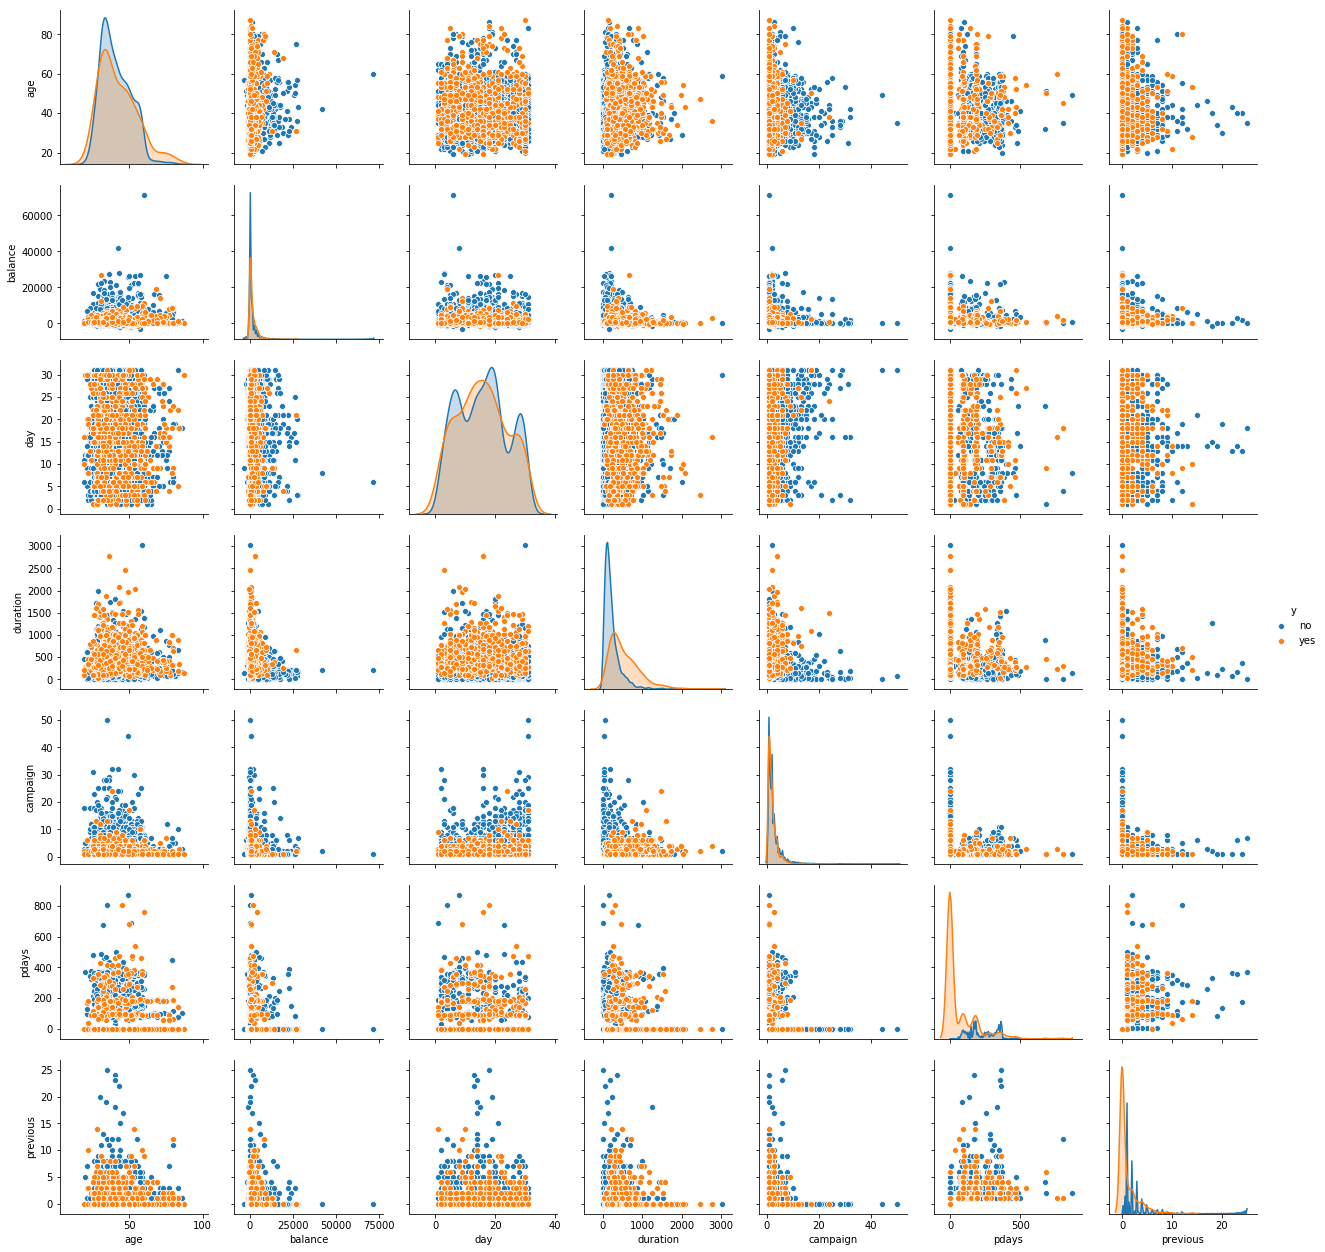

In [76]:
h = sns.pairplot(df, hue="y")

In [77]:
#Getting all the unique numerical variables
unique_vars=[]

print('all unique variables are:')
for var in df.columns:
    count=df[var].nunique()
    print(var, '----->',count)
    if count<10:
        unique_vars.append(var) 
unique_vars

all unique variables are:
age -----> 67
job -----> 12
marital -----> 3
education -----> 4
default -----> 2
balance -----> 2353
housing -----> 2
loan -----> 2
contact -----> 3
day -----> 31
month -----> 12
duration -----> 875
campaign -----> 32
pdays -----> 292
previous -----> 24
poutcome -----> 4
y -----> 2


['marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome',
 'y']

In [78]:
#how many unique values do we have
for var in unique_vars:
    print(var,'\n--------------------\n',df[var].value_counts(),'\n')

marital 
--------------------
 married     2797
single      1196
divorced     528
Name: marital, dtype: int64 

education 
--------------------
 secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64 

default 
--------------------
 no     4445
yes      76
Name: default, dtype: int64 

housing 
--------------------
 yes    2559
no     1962
Name: housing, dtype: int64 

loan 
--------------------
 no     3830
yes     691
Name: loan, dtype: int64 

contact 
--------------------
 cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64 

poutcome 
--------------------
 unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64 

y 
--------------------
 no     4000
yes     521
Name: y, dtype: int64 



In [79]:

#change the data types for attributes less than 10 
df['marital'] = df['marital'].astype('object')
df['education'] = df['education'].astype('object')
df['default'] = df['default'].astype('object')
df['housing'] = df['housing'].astype('object')
df['loan'] = df['loan'].astype('object')
df['contact'] = df['contact'].astype('object')
df['poutcome'] = df['poutcome'].astype('object')
#df['y'] = df['y'].astype('object')


In [80]:
hd_map = {'no' : 0, 'yes': 1}
df["y"] = df["y"].map(hd_map)

In [81]:

# select all categorical variables
categorical = df.select_dtypes(include=['object'])

#categorical = [var for var in df.columns if df[var].dtype=='O']
for cats in categorical:
    print('\n\n' +cats+'\n****************')
    print(df[cats].value_counts())



job
****************
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64


marital
****************
married     2797
single      1196
divorced     528
Name: marital, dtype: int64


education
****************
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64


default
****************
no     4445
yes      76
Name: default, dtype: int64


housing
****************
yes    2559
no     1962
Name: housing, dtype: int64


loan
****************
no     3830
yes     691
Name: loan, dtype: int64


contact
****************
cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64


month
****************
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct

In [82]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


Categorical Visulizations

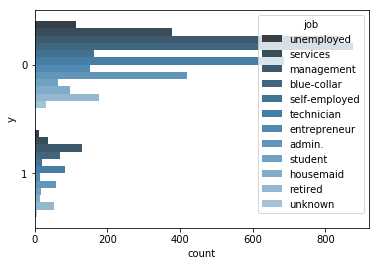

job  admin.  blue-collar  entrepreneur  housemaid  management  retired  \
y                                                                        
0       420          877           153         98         838      176   
1        58           69            15         14         131       54   

job  self-employed  services  student  technician  unemployed  unknown  
y                                                                       
0              163       379       65         685         115       31  
1               20        38       19          83          13        7  


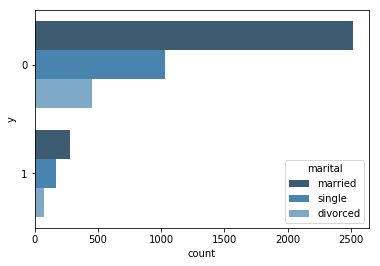

marital  divorced  married  single
y                                 
0             451     2520    1029
1              77      277     167


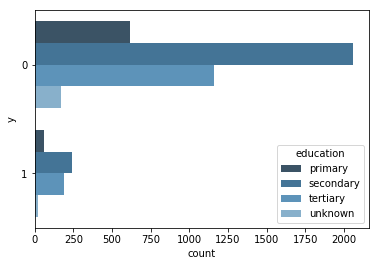

education  primary  secondary  tertiary  unknown
y                                               
0              614       2061      1157      168
1               64        245       193       19


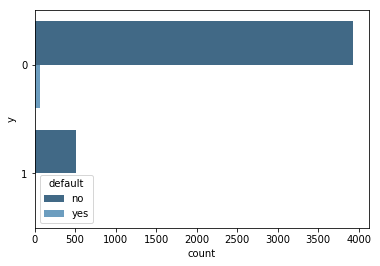

default    no  yes
y                 
0        3933   67
1         512    9


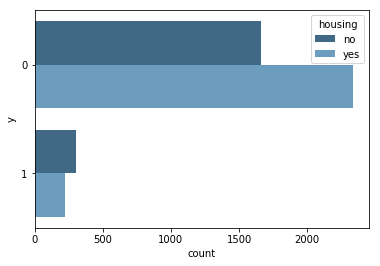

housing    no   yes
y                  
0        1661  2339
1         301   220


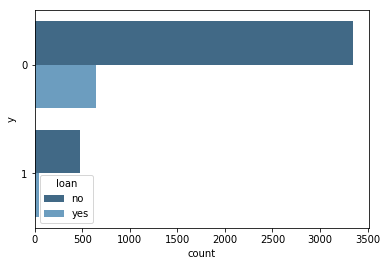

loan    no  yes
y              
0     3352  648
1      478   43


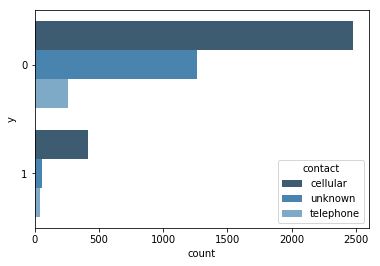

contact  cellular  telephone  unknown
y                                    
0            2480        257     1263
1             416         44       61


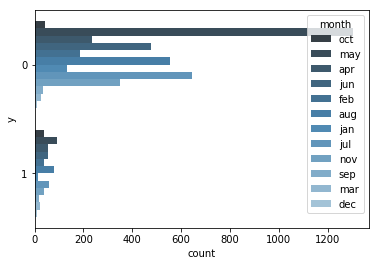

month  apr  aug  dec  feb  jan  jul  jun  mar   may  nov  oct  sep
y                                                                 
0      237  554   11  184  132  645  476   28  1305  350   43   35
1       56   79    9   38   16   61   55   21    93   39   37   17


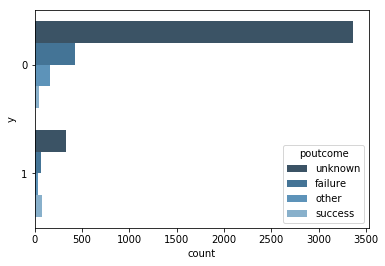

poutcome  failure  other  success  unknown
y                                         
0             427    159       46     3368
1              63     38       83      337


In [83]:
for cat in categorical:
    sns.countplot(y="y", hue=cat, data=df, palette="Blues_d")
    plt.show()

    # Table of counts
    counttable = pd.crosstab(df['y'], df[cat])
    print(counttable)

Numerical Data

In [84]:

# age, balance, cholesterol,duration, 
numerical = [var for var in df.columns if df[var].dtype!='O']
#for nums in numerical:
#    print('\n\n' +nums+'\n****************')
#    print(df[nums].value_counts())

In [85]:
# Checking for outliers in the continuous variables
numerical_df = df[numerical]

# Checking outliers at 25%,50%,75%,90%,95% and 99%
numerical_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,age,balance,day,duration,campaign,pdays,previous,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579,0.115240
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562,0.319347
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,0.000000
90%,56.000000,3913.000000,28.000000,579.000000,6.000000,183.000000,2.000000,1.000000
95%,59.000000,6102.000000,30.000000,763.000000,8.000000,317.000000,3.000000,1.000000
99%,72.000000,14194.600000,31.000000,1259.000000,16.000000,370.000000,8.000000,1.000000


Numerical Visualizations

''

<Figure size 1440x720 with 0 Axes>

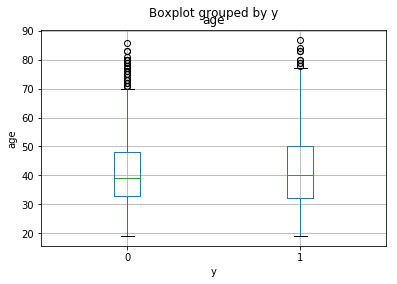

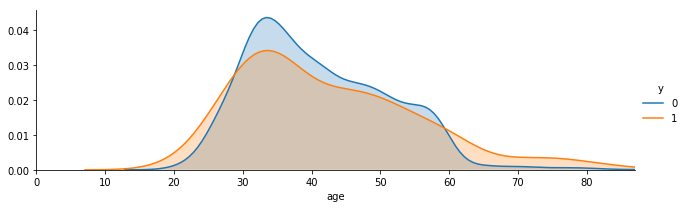

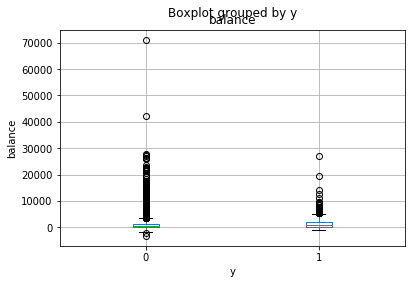

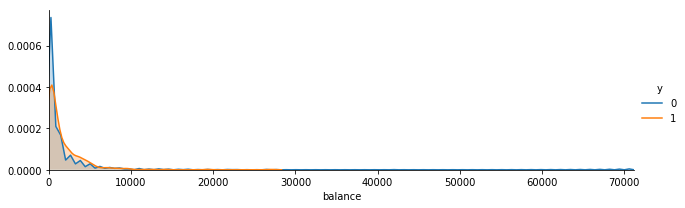

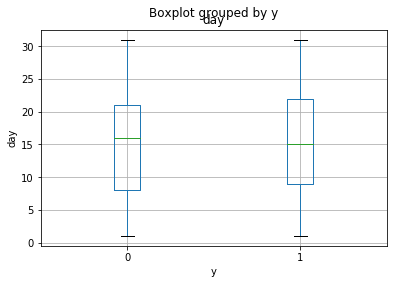

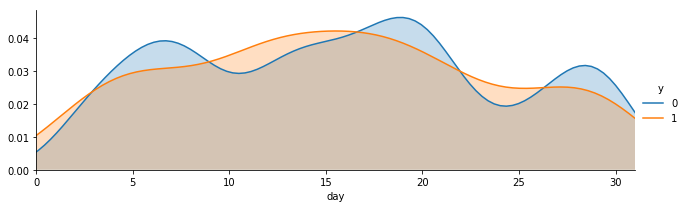

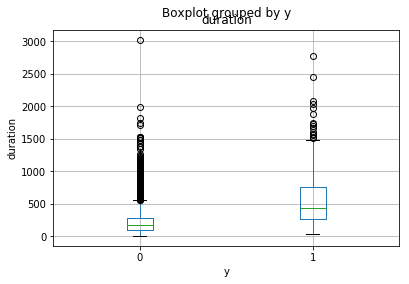

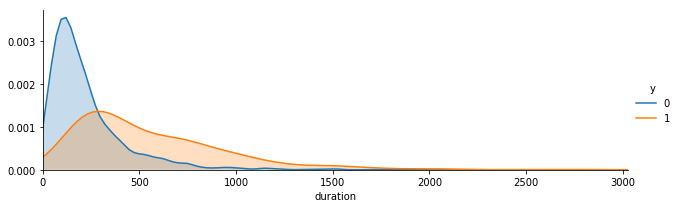

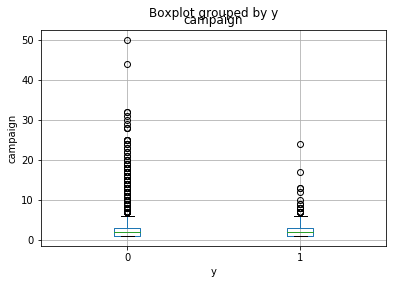

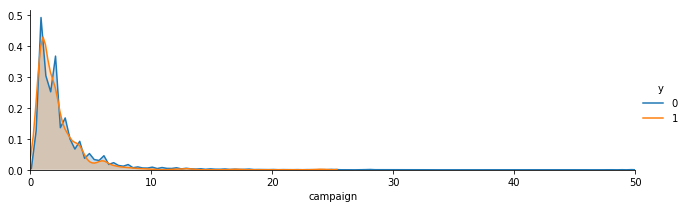

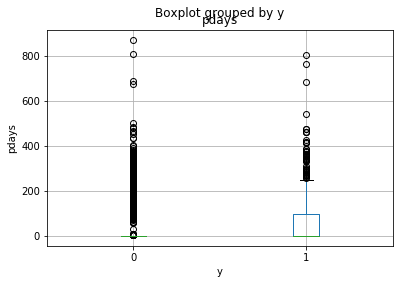

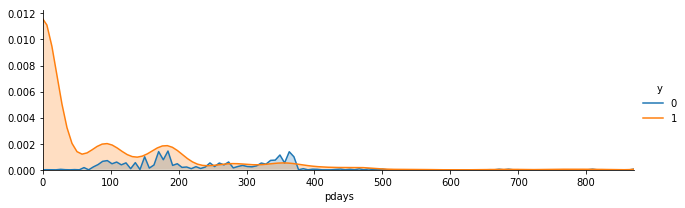

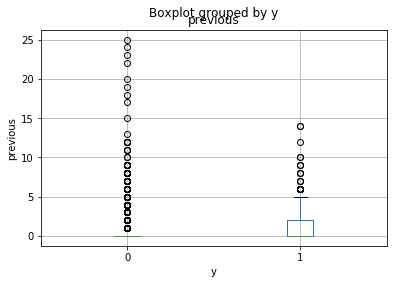

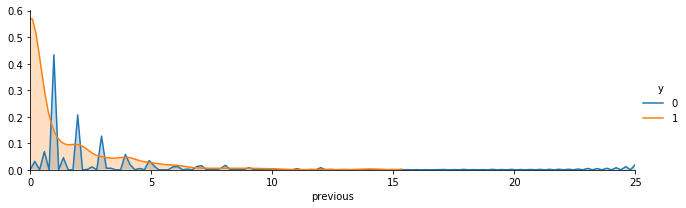

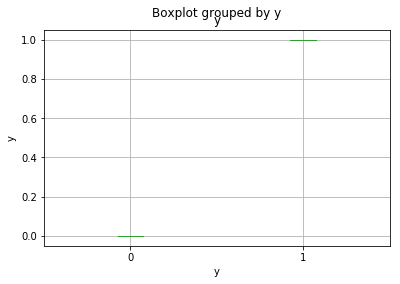

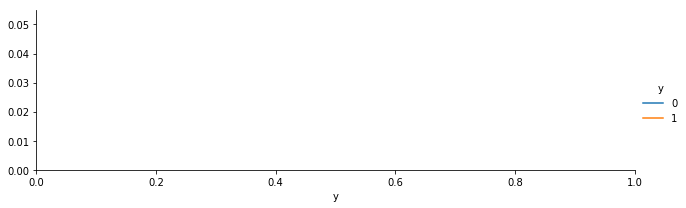

In [86]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(20,10))

#plt.figure(figsize=(24,12))

for var in numerical:
    df.boxplot(column = var,by = 'y')
    plt.xticks()
    plt.xlabel('y')
    plt.ylabel(var)
    
    facet = sns.FacetGrid(df, hue = "y", aspect = 3)
    facet.map(sns.kdeplot,var,shade= True)
    facet.set(xlim=(0, df[var].max()))
    facet.add_legend()
;

### dummy the categorical data

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null int64
dtypes: int64(8), object(9)
memory usage: 600.5+ KB


In [88]:
#need to dummify
dummify_vars=['job','marital','education','default', 'housing', 'loan', 'contact', 'month','poutcome']
dummify=df[['job','marital','education','default', 'housing', 'loan', 'contact', 'month','poutcome']]

In [89]:
df_dummies= pd.get_dummies(dummify,drop_first=True)
df_dummies.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [90]:
# concat df_categorical with original df
df = df.drop(['job','marital','education','default', 'housing', 'loan', 'contact', 'month','poutcome'], axis=1)
df = pd.concat([df, df_dummies], axis=1)
df.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [91]:
df.to_csv('cleaned_bank_data.csv')